In [0]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
numpy.random.seed(42)

In [0]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), activation= 'relu'))
model.add(Conv2D(32, (3, 3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'same', activation= 'relu'))
model.add(Conv2D(64, (3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
history = model.fit(x_train, y_train, batch_size=128, epochs= 25, validation_split=0.1, shuffle=True, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 189s - loss: 1.6120 - acc: 0.4099 - val_loss: 1.3084 - val_acc: 0.5366
Epoch 2/25
 - 188s - loss: 1.1875 - acc: 0.5775 - val_loss: 1.0290 - val_acc: 0.6356
Epoch 3/25
 - 189s - loss: 1.0054 - acc: 0.6448 - val_loss: 0.8723 - val_acc: 0.6930
Epoch 4/25
 - 186s - loss: 0.8830 - acc: 0.6893 - val_loss: 0.8105 - val_acc: 0.7146
Epoch 5/25
 - 183s - loss: 0.7947 - acc: 0.7192 - val_loss: 0.7473 - val_acc: 0.7378
Epoch 6/25
 - 179s - loss: 0.7125 - acc: 0.7493 - val_loss: 0.6822 - val_acc: 0.7678
Epoch 7/25
 - 177s - loss: 0.6490 - acc: 0.7732 - val_loss: 0.7138 - val_acc: 0.7494
Epoch 8/25
 - 175s - loss: 0.5867 - acc: 0.7909 - val_loss: 0.6755 - val_acc: 0.7750
Epoch 9/25
 - 172s - loss: 0.5438 - acc: 0.8075 - val_loss: 0.6682 - val_acc: 0.7770
Epoch 10/25
 - 173s - loss: 0.4888 - acc: 0.8282 - val_loss: 0.6761 - val_acc: 0.7796
Epoch 11/25
 - 172s - loss: 0.4496 - acc: 0.8409 - val_loss: 0.6686 - val_acc: 0.7794
Epoch 12/25
 -

In [38]:
scores = model.evaluate(x_test, y_test, verbose = 0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 77.20%


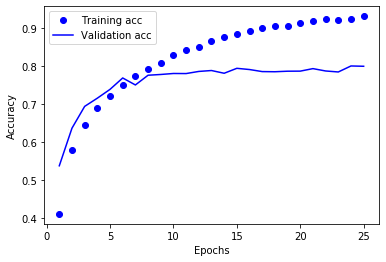

In [39]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [41]:
!ls

cifar10_model.h5  cifar10_model.json  sample_data


In [0]:
from google.colab import files

In [0]:
files.download("cifar10_model.json")

In [0]:
files.download("cifar10_model.h5")

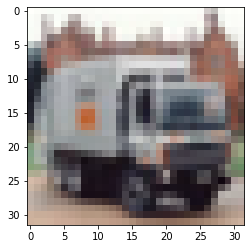

In [53]:
index = 11
plt.imshow(x_test[index])
plt.show()

In [0]:
x = x_test[index]
x = np.expand_dims(x, axis=0)

In [57]:
prediction = model.predict(x)
print(prediction)

[[8.8445459e-11 2.9293960e-04 2.5273964e-15 3.0726235e-13 7.4971915e-20
  9.1285910e-15 1.8327895e-16 8.2866343e-15 1.2254095e-10 9.9970704e-01]]


In [59]:
prediction = np.argmax(prediction)
print(classes[prediction])

грузовик


In [64]:
from google.colab import files
files.upload()

Saving samolet.jpg to samolet.jpg


{'samolet.jpg': b'\xff\xd8\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x02\x9b\x03\xe8\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x01\x01\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x05\x06\x07\x03\x04\x08\t\xff\xc4\x00G\x10\x00\x01\x03\x03\x02\x03\x04\x07\x06\x05\x02\x05\x03\x03\x05\x00\x00\x01\x02\x03\x04\x05\x11\x06!\x121A\x07\x13Qa"2Bq\x81\x91\xa1\x14#Rb\xb1\xc1\x08\x153r\xd1\x82\xe1\x16$C\x92\xf04S\xc2%\xa2\xf15dt\x94\xb2\xff\xc4\x00\x1a\x01\x01

In [65]:
!ls

cifar10_model.h5  cifar10_model.json  samolet.jpg  sample_data


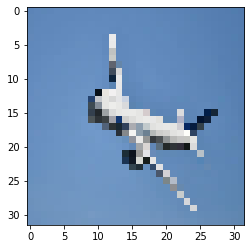

In [69]:
img_path = 'samolet.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

In [0]:
x = image.img_to_array(img)
x /=255

In [0]:
x =np.expand_dims(x, axis=0)

In [72]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

самолет
